In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#setting DataFrame options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#supprsing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#checking for missing  values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

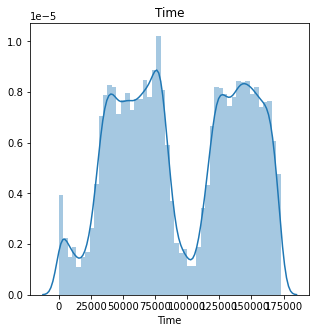

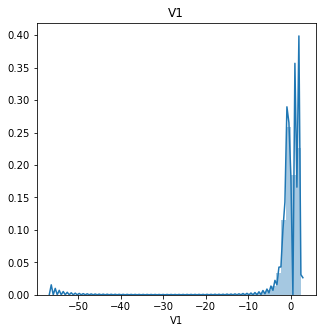

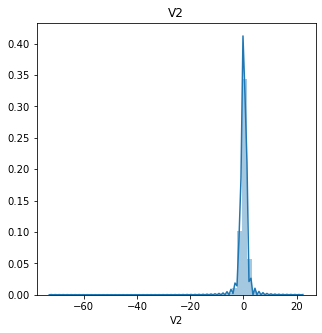

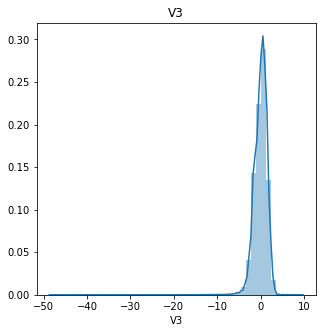

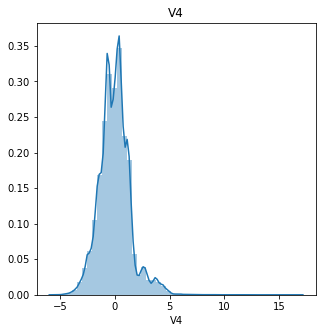

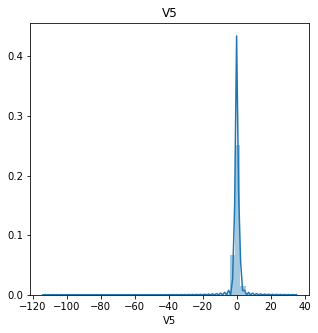

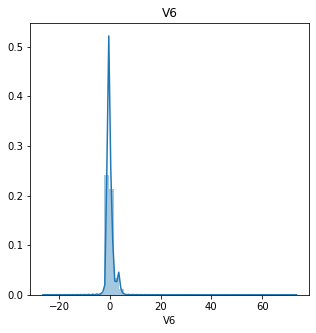

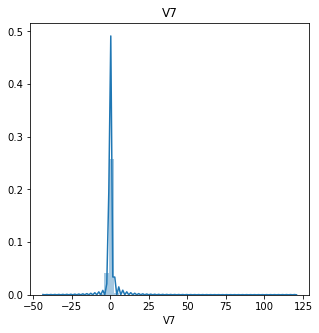

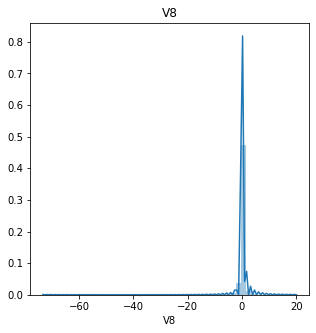

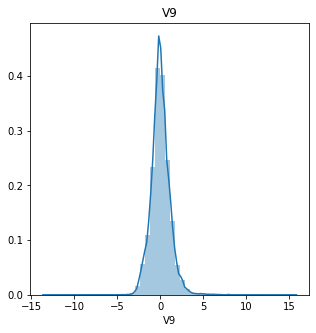

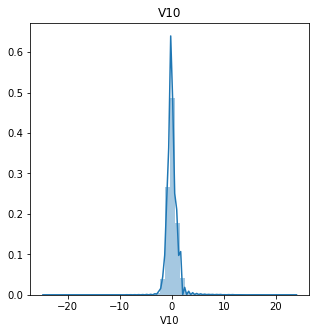

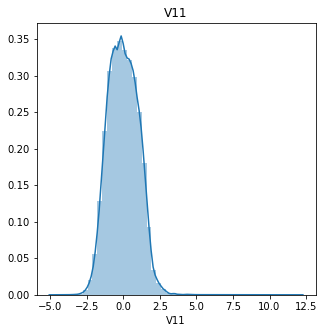

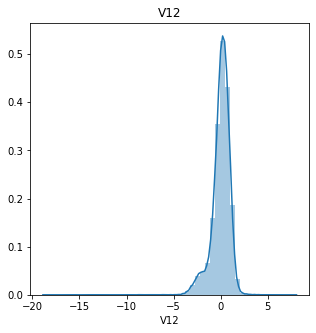

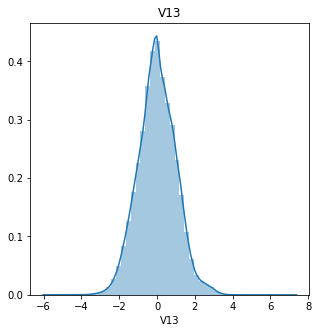

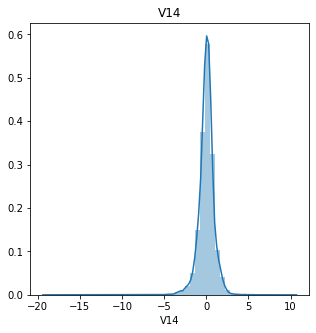

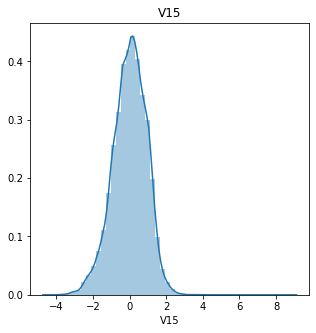

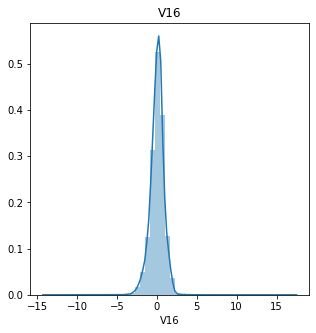

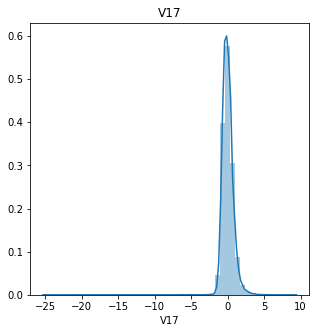

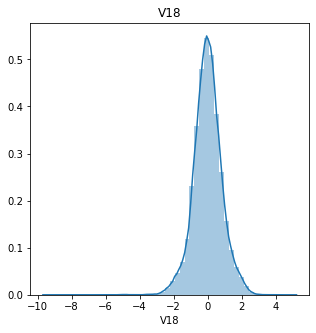

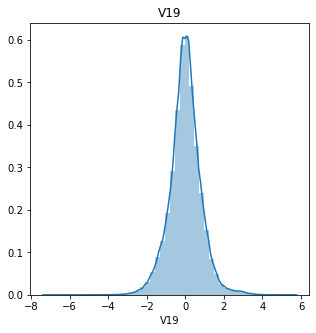

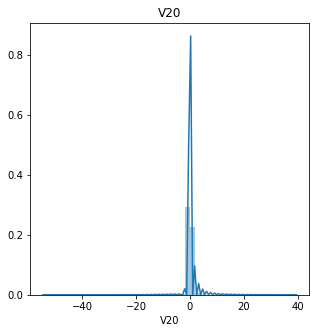

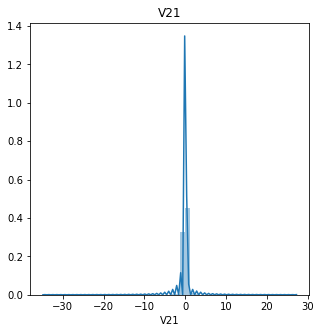

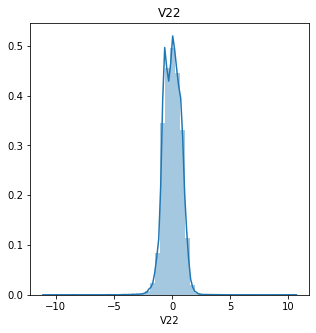

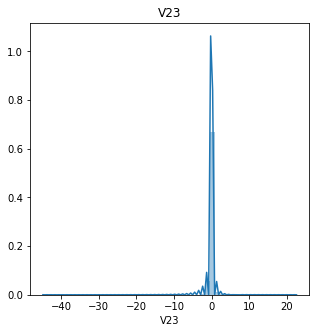

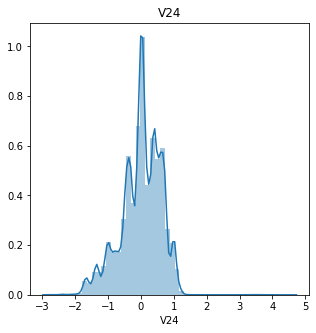

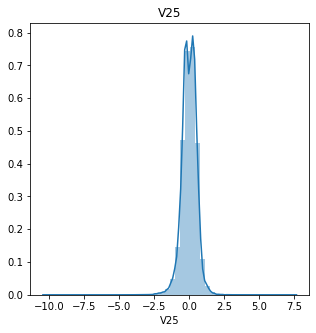

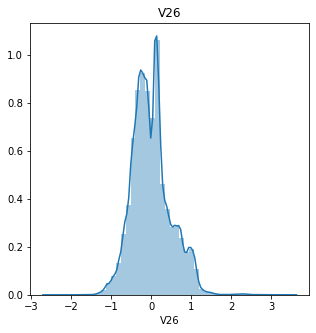

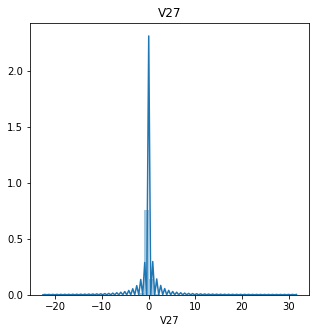

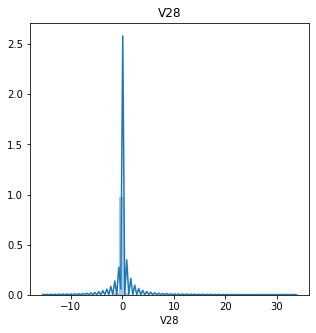

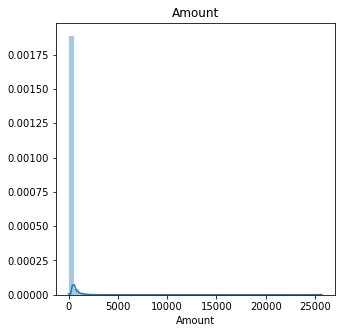

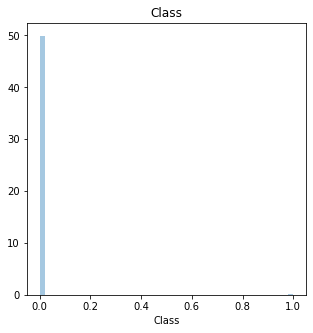

In [5]:
#checking the dfeatures post PCA for skewness
cols=df.columns
for feature in cols:
    plt.figure(figsize=(5,5))
    sns.distplot(df[feature])
    plt.title(feature)
    plt.plot

In [6]:
#Separating Data into Classes for comparing the disrtribution
dfclass1=df[df['Class']==1]
dfclass0=df[df['Class']==0]

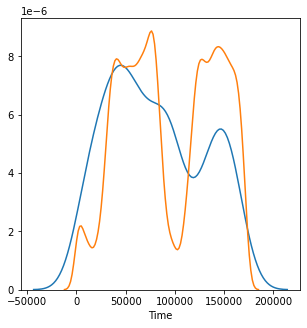

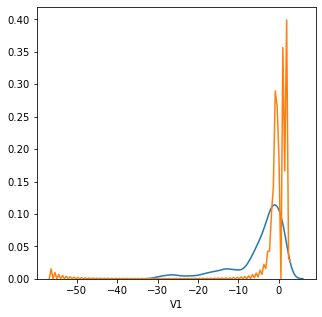

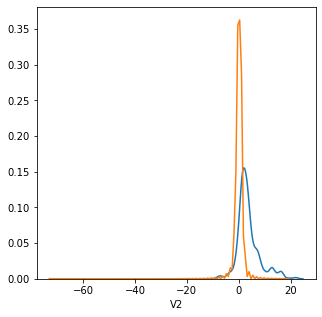

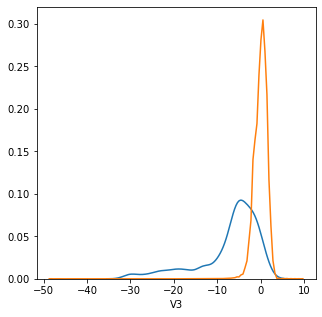

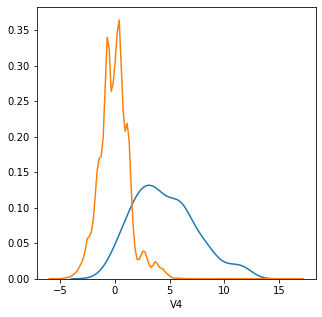

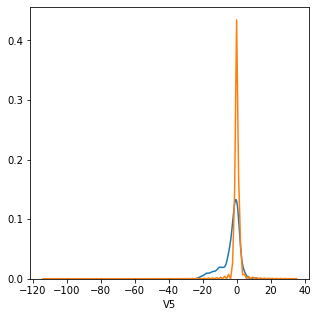

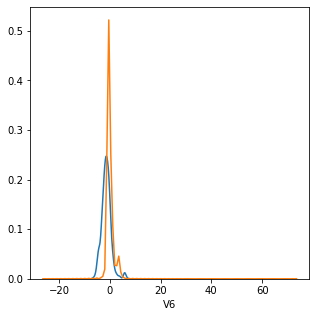

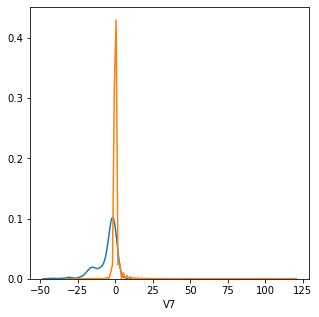

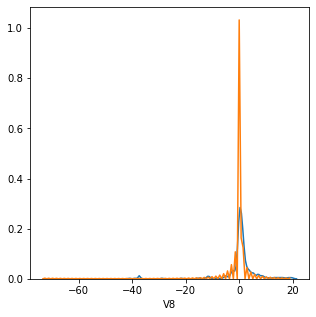

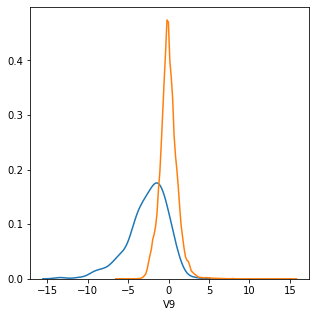

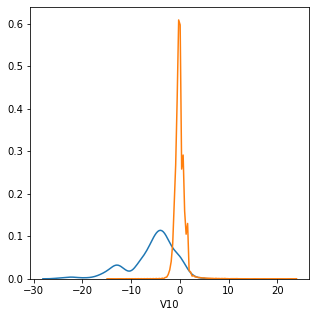

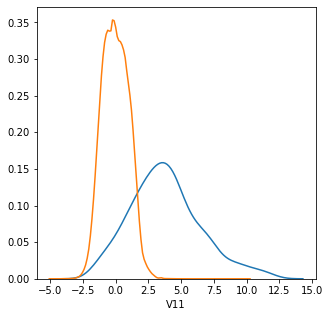

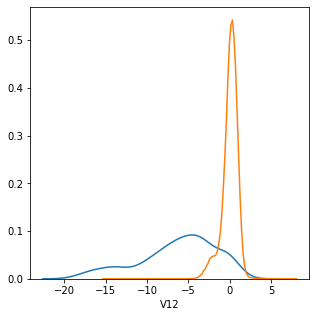

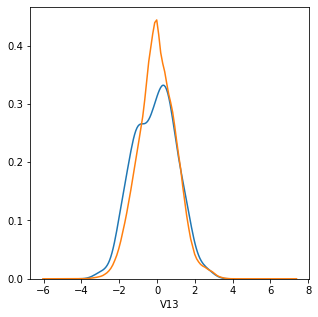

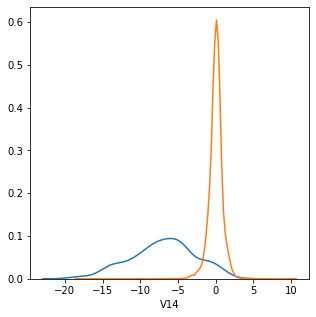

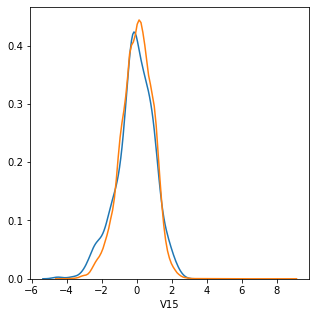

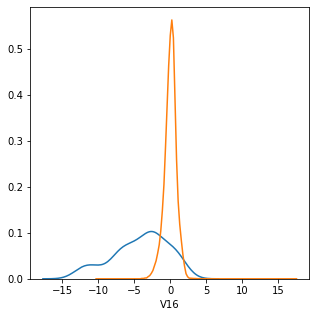

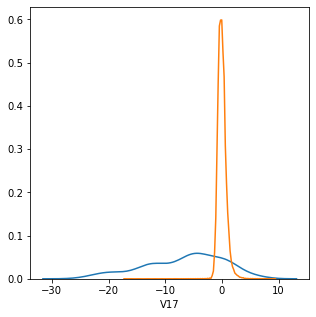

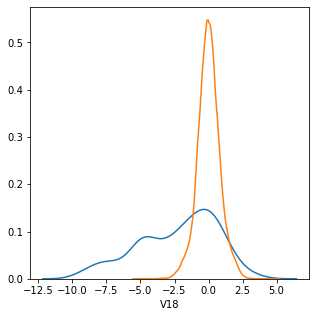

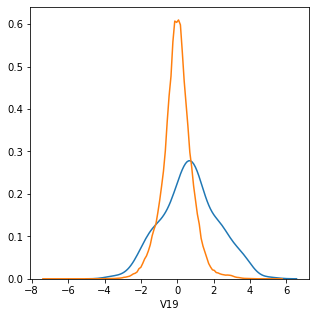

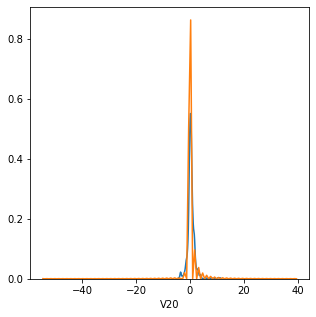

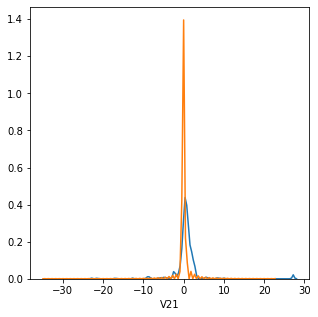

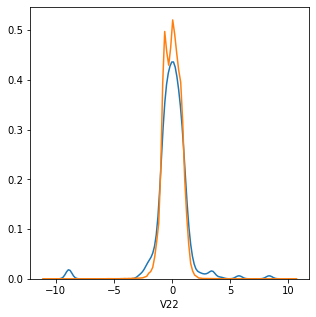

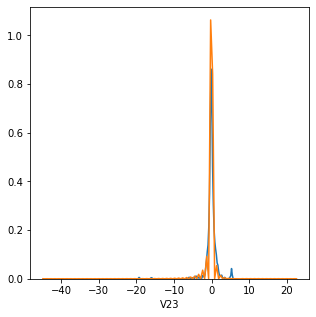

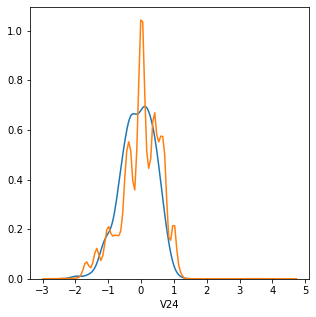

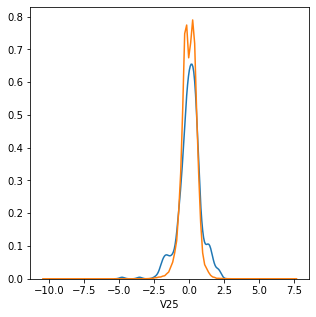

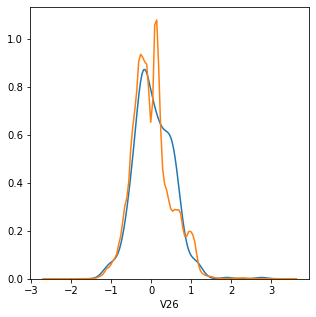

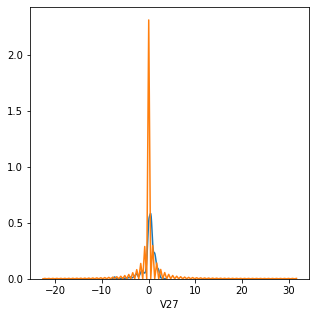

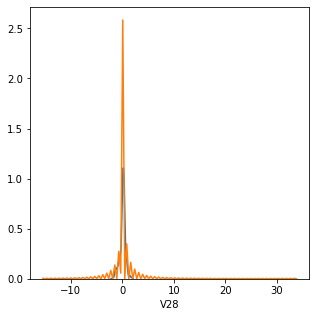

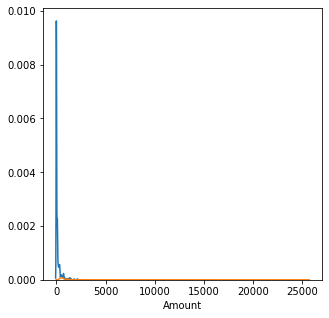

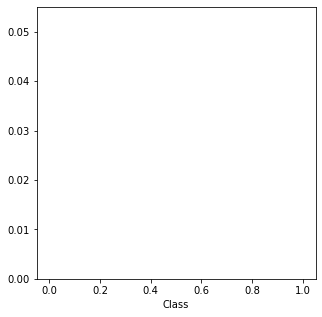

In [7]:
#checking the features post PCA for skewness
cols=df.columns
for feature in cols:
    plt.figure(figsize=(5,5))
    sns.distplot(dfclass1[feature],hist=False)
    sns.distplot(dfclass0[feature],hist=False)
    plt.plot
    

Only handfull of features are following Gaussian distribution, thus selecting limited featres following the distribution for better models

In [8]:
#Droping the column time as it has no significance in current study.
#df.drop(['Time',],axis=1,inplace=True)
X=df[['V13','V15','V19','V21','V22','V25','V27','V28','Amount']]
y=df['Class']


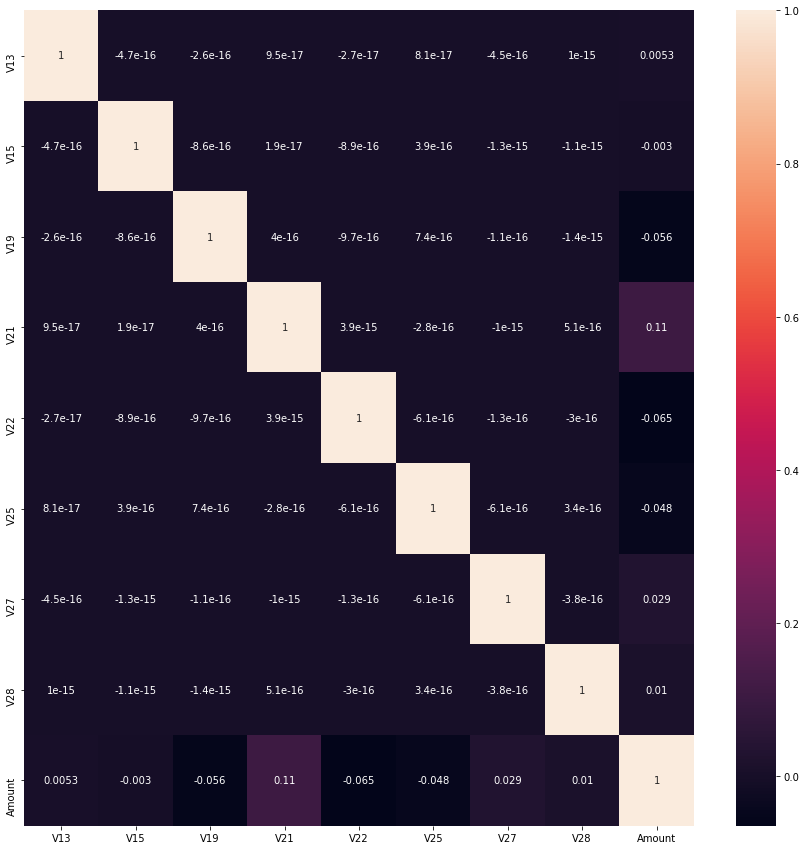

In [9]:
#Checking correlation for the selected features
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(),annot=True)
plt.show()


In [10]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100,stratify=y)

In [11]:
# Perfroming Power transformation on train set
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
X_train_temp = scaler.fit_transform(X_train)
X_test_temp=scaler.transform(X_test)

In [12]:
X_train_scaled=pd.DataFrame(X_train_temp)
X_test_scaled=pd.DataFrame(X_test_temp)

As the data is highly imbalanced, Floowing below methods to balance the class
1. RandomOverSampling
2. SMOTE
3. ADASYN

In [13]:
# Perform oversampling/SMOTE/ADASYN

#oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_scaled, y_train)

#SMOTE and ADASYN
from imblearn.over_sampling import SMOTE, ADASYN
X_train_smote, y_train_smote = SMOTE(random_state=100).fit_resample(X_train_scaled, y_train)
X_train_ada, y_train_ada = ADASYN(sampling_strategy='minority',random_state=100,n_neighbors=5).fit_resample(X_train_scaled, y_train)






In [14]:
#Data set before and after
print("Class occurance: Original Dataset")
print(y_train.value_counts())
print("Class occurance: RandomOverSampler")
print(y_train_ros.value_counts())
print("Class occurance: SMOTE")
print(y_train_smote.value_counts())
print("Class occurance: ADASYN")
print(y_train_ada.value_counts())

Class occurance: Original Dataset
0    199020
1       344
Name: Class, dtype: int64
Class occurance: RandomOverSampler
1    199020
0    199020
Name: Class, dtype: int64
Class occurance: SMOTE
1    199020
0    199020
Name: Class, dtype: int64
Class occurance: ADASYN
1    199023
0    199020
Name: Class, dtype: int64


# Building Models

# Below Models are developed and evaluvated
1. Simple Logistic Regression

    (i) Original Dataset(imbalanced) 
   (ii) RandomOverSampling
  (iii) SMOTE
   (iv) ADASYN
   
   
   
2. RandomForest with RandomizedSearchCV hyperparamter tuning

    (i) Original Dataset(imbalanced)
   (ii) RandomOverSampling
  (iii) SMOTE
   (iv) ADASYN
   
   
   
3. Decision Tree  with RandomizedSearchCV hyperparamter tuning

    (i) Original Dataset(imbalanced)
   (ii) RandomOverSampling
  (iii) SMOTE
   (iv) ADASYN
   
   
   
4. XGBOOST  with RandomizedSearchCV hyperparamter tuning

    (i) Original Dataset(imbalanced)
   (ii) RandomOverSampling
  (iii) SMOTE
   (iv) ADASYN
   

In [15]:
#performing Simple Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Original Data
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_train = logreg.predict(X_train_scaled)
y_pred_test = logreg.predict(X_test_scaled)

# RandomOverSampler data
logros = LogisticRegression()
logros.fit(X_train_ros, y_train_ros)
y_pred_train_ros = logros.predict(X_train_ros)
y_pred_test_ros = logros.predict(X_test_scaled)


# SMOTE Data
logsmote = LogisticRegression()
logsmote.fit(X_train_smote, y_train_smote)
y_pred_train_smote = logsmote.predict(X_train_smote)
y_pred_test_smote = logsmote.predict(X_test_scaled)


# ADASYN Data
logada = LogisticRegression()
logada.fit(X_train_ada, y_train_ada)
y_pred_train_ada = logada.predict(X_train_ada)
y_pred_test_ada = logada.predict(X_test_scaled)

In [16]:
# Evaluvating the Result
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score


#Original Data
print(" Original Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train, y_pred_train))
print("Classification Report: ")
print(classification_report(y_train, y_pred_train)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test)) 
print("==================================================================")

# RandomOverSampler data
from sklearn.metrics import confusion_matrix, classification_report
print("RandomOverSampler data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ros, y_pred_train_ros))
print("Classification Report: ")
print(classification_report(y_train_ros, y_pred_train_ros)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ros))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ros))
print("==================================================================")

# SMOTE DATA
from sklearn.metrics import confusion_matrix, classification_report
print("SMOTE DATA")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_smote, y_pred_train_smote))
print("Classification Report: ")
print(classification_report(y_train_smote, y_pred_train_smote)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_smote))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_smote))
print("==================================================================")

# ADASYC DATA
from sklearn.metrics import confusion_matrix, classification_report
print("ADASYC DATA")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ada, y_pred_train_ada))
print("Classification Report: ")
print(classification_report(y_train_ada, y_pred_train_ada)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ada))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ada))
print("==================================================================")

 Original Data
Train Data
ROC_AUC_SCORE:  0.5071795109992451
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.12      0.01      0.03       344

    accuracy                           1.00    199364
   macro avg       0.56      0.51      0.51    199364
weighted avg       1.00      1.00      1.00    199364

Test Data
ROC_AUC_SCORE:  0.5067039986818404
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.18      0.01      0.03       148

    accuracy                           1.00     85443
   macro avg       0.59      0.51      0.51     85443
weighted avg       1.00      1.00      1.00     85443

RandomOverSampler data
Train Data
ROC_AUC_SCORE:  0.6454275952165611
Classification Report: 
              precision    recall  f1-score   support

           0       0.64      0.67      0.65 

# RandomForest Model

In [17]:
#performing RandomForest with hyperparamter tuning

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled,y_train)
model.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.5min finished


{'n_estimators': 200,
 'min_samples_split': 300,
 'min_samples_leaf': 350,
 'max_features': 8,
 'max_depth': 8,
 'criterion': 'entropy'}

In [18]:
#Performing RandomForest on Original Dataset

random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled,y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.4min finished


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=101),
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_depth': [8], 'max_features': [8],
                                        'min_samples_leaf': [350],
                                        'min_samples_split': [300],
                                        'n_estimators': [200]},
                   random_state=101, verbose=1)

In [19]:
y_pred_train_O_RS=model.predict(X_train_scaled)
y_pred_test_O_RS=model.predict(X_test_scaled)

In [20]:
#Original Data
print(" Original Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train, y_pred_train_O_RS))
print("Classification Report: ")
print(classification_report(y_train, y_pred_train_O_RS)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_O_RS))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_O_RS)) 
print("==================================================================")

 Original Data
Train Data
ROC_AUC_SCORE:  0.5
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.00      0.00      0.00       344

    accuracy                           1.00    199364
   macro avg       0.50      0.50      0.50    199364
weighted avg       1.00      1.00      1.00    199364

Test Data
ROC_AUC_SCORE:  0.5
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.00      0.00      0.00       148

    accuracy                           1.00     85443
   macro avg       0.50      0.50      0.50     85443
weighted avg       1.00      1.00      1.00     85443



In [21]:
#performing RandomForest with hyperparamter tuning with OversampleData

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}


clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
model.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  8.6min finished


{'n_estimators': 200,
 'min_samples_split': 300,
 'min_samples_leaf': 350,
 'max_features': 8,
 'max_depth': 8,
 'criterion': 'entropy'}

In [22]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
y_pred_train_ros_RS=model.predict(X_train_ros)
y_pred_test_ros_RS=model.predict(X_test_scaled)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  5.5min finished


In [23]:
#Original Data
print(" RandomOverSampling Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ros, y_pred_train_ros_RS))
print("Classification Report: ")
print(classification_report(y_train_ros, y_pred_train_ros_RS)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ros_RS))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ros_RS)) 
print("==================================================================")

 RandomOverSampling Data
Train Data
ROC_AUC_SCORE:  0.9482589689478446
Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.96      0.95    199020
           1       0.96      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Test Data
ROC_AUC_SCORE:  0.8197066460915455
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85295
           1       0.03      0.68      0.06       148

    accuracy                           0.96     85443
   macro avg       0.52      0.82      0.52     85443
weighted avg       1.00      0.96      0.98     85443



In [24]:
#performing RandomForest with hyperparamter tuning with SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}


clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
model.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  7.8min finished


{'n_estimators': 200,
 'min_samples_split': 300,
 'min_samples_leaf': 350,
 'max_features': 8,
 'max_depth': 8,
 'criterion': 'entropy'}

In [25]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
y_pred_train_smote_RS=model.predict(X_train_smote)
y_pred_test_smote_RS=model.predict(X_test_scaled)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  8.0min finished


In [26]:
#SMOTE Data
print(" SMOTE Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_smote, y_pred_train_smote_RS))
print("Classification Report: ")
print(classification_report(y_train_smote, y_pred_train_smote_RS)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_smote_RS))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_smote_RS)) 
print("==================================================================")

 SMOTE Data
Train Data
ROC_AUC_SCORE:  0.9197718822228922
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92    199020
           1       0.95      0.89      0.92    199020

    accuracy                           0.92    398040
   macro avg       0.92      0.92      0.92    398040
weighted avg       0.92      0.92      0.92    398040

Test Data
ROC_AUC_SCORE:  0.8513350723958027
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.75      0.05       148

    accuracy                           0.95     85443
   macro avg       0.51      0.85      0.51     85443
weighted avg       1.00      0.95      0.97     85443



In [27]:
#performing RandomForest with hyperparamter tuning with ADASYC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}


clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
model.best_params_

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 17.0min finished


{'n_estimators': 200,
 'min_samples_split': 300,
 'min_samples_leaf': 350,
 'max_features': 8,
 'max_depth': 8,
 'criterion': 'entropy'}

In [28]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = RandomForestClassifier( random_state= 101)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
y_pred_train_ada_RS=model.predict(X_train_ada)
y_pred_test_ada_RS=model.predict(X_test_scaled)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  7.7min finished


In [29]:
#ADASYC Data
print(" ADASYC Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ada, y_pred_train_ada_RS))
print("Classification Report: ")
print(classification_report(y_train_ada, y_pred_train_ada_RS)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ada_RS))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ada_RS)) 
print("==================================================================")

 ADASYC Data
Train Data
ROC_AUC_SCORE:  0.9064224588789437
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91    199020
           1       0.94      0.87      0.90    199023

    accuracy                           0.91    398043
   macro avg       0.91      0.91      0.91    398043
weighted avg       0.91      0.91      0.91    398043

Test Data
ROC_AUC_SCORE:  0.8577361082285169
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.02      0.77      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.86      0.51     85443
weighted avg       1.00      0.94      0.97     85443



# Decision Tree

In [31]:
#implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier

random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 100, n_jobs = -1)
model.fit(X_train_scaled,y_train)
model.best_params_


Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


ValueError: Invalid parameter n_estimators for estimator DecisionTreeClassifier(random_state=100). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled,y_train)
y_pred_train_O_DT=model.predict(X_train_scaled)
y_pred_test_O_DT=model.predict(X_test_scaled)

In [ ]:
#Original Data
print(" Original Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train, y_pred_train_O_DT))
print("Classification Report: ")
print(classification_report(y_train, y_pred_train_O_DT)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_O_DT))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_O_DT)) 
print("==================================================================")

In [ ]:
# Oversamplig Data
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}


clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
y_pred_train_ROS_DT=model.predict(X_train_ros)
y_pred_test_ROS_DT=model.predict(X_test_scaled)

In [ ]:
#Oversampling Data
print(" Oversampling Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ros, y_pred_train_ROS_DT))
print("Classification Report: ")
print(classification_report(y_train_ros, y_pred_train_ROS_DT)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ROS_DT))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ROS_DT)) 
print("==================================================================")

In [ ]:
# SMOTE Data
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
y_pred_train_smote_DT=model.predict(X_train_smote)
y_pred_test_smote_DT=model.predict(X_test_scaled)

In [ ]:
#SMOTE Data
print(" SMOTE Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_smote, y_pred_train_smote_DT))
print("Classification Report: ")
print(classification_report(y_train_smote, y_pred_train_smote_DT)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_smote_DT))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_smote_DT)) 
print("==================================================================")

In [ ]:
# ADASYNC Data
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}


clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

clf = DecisionTreeClassifier(random_state=100)
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
y_pred_train_ada_DT=model.predict(X_train_ada)
y_pred_test_ada_DT=model.predict(X_test_scaled)

In [ ]:
#ADASYC Data
print(" ADASYC Data")
print("Train Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ada, y_pred_train_ada_DT))
print("Classification Report: ")
print(classification_report(y_train_ada, y_pred_train_ada_DT)) 

from sklearn.metrics import confusion_matrix, classification_report
print("Test Data")
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_pred_test_ada_DT))
print("Classification Report: ")
print(classification_report(y_test, y_pred_test_ada_DT)) 
print("==================================================================")

# XGBOOST Model

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# 1. Original Data

In [ ]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100)
    xgb.fit(X_train_scaled,y_train)
    score1.append(xgb.score(X_train_scaled,y_train))
    score2.append(xgb.score(X_test_scaled,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()


In [ ]:
xgb=XGBClassifier(n_estimators=12,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100 )
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled,y_train)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_scaled,y_train)
y_train_pred=model.predict(X_train_scaled)
print("ROC_AUC_SCORE: ",roc_auc_score(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred)) 

y_test_pred=model.predict(X_test_scaled)
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

In [ ]:
# 2. ROS Data

In [ ]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100)
    xgb.fit(X_train_ros,y_train_ros)
    score1.append(xgb.score(X_train_ros,y_train_ros))
    score2.append(xgb.score(X_test_scaled,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
xgb=XGBClassifier(n_estimators=12,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100 )
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ros,y_train_ros)
y_train_ros_pred=model.predict(X_train_ros)
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ros, y_train_ros_pred))
print(classification_report(y_train_ros, y_train_ros_pred)) 

y_test_pred=model.predict(X_test_scaled)
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

In [ ]:
#3. SMOTE DATA

In [ ]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100)
    xgb.fit(X_train_smote,y_train_smote)
    score1.append(xgb.score(X_train_smote,y_train_smote))
    score2.append(xgb.score(X_test_scaled,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
xgb=XGBClassifier(n_estimators=12,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100 )
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_smote,y_train_smote)
y_train_smote_pred=model.predict(X_train_smote)
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_smote, y_train_smote_pred))
print(classification_report(y_train_smote, y_train_smote_pred)) 

y_test_pred=model.predict(X_test_scaled)
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

In [ ]:
#4. ADASYN DATA

In [ ]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100)
    xgb.fit(X_train_ada,y_train_ada)
    score1.append(xgb.score(X_train_ada,y_train_ada))
    score2.append(xgb.score(X_test_scaled,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGboost')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
xgb=XGBClassifier(n_estimators=12,learning_rate=0.2, objective='binary:logistic',n_jobs=-1,random_state=100 )
random_search = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(50, 400, 50),
    'min_samples_split': range(50, 400, 50),
    'max_features': [8,10,15],
    'n_estimators': range(50, 400, 50)}

model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
model.best_params_

In [ ]:
random_search = {
               'criterion': ['entropy'],
               'max_depth': [8],
               'max_features': ['sqrt'],
               'min_samples_leaf': [350],
               'min_samples_split':[300],
               'max_features': [8],
               'n_estimators': [200]}


model = RandomizedSearchCV(estimator = xgb, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train_ada,y_train_ada)
y_train_ada_pred=model.predict(X_train_ada)
print("ROC_AUC_SCORE: ",roc_auc_score(y_train_ada, y_train_ada_pred))
print(classification_report(y_train_ada, y_train_ada_pred)) 

y_test_pred=model.predict(X_test_scaled)
print("ROC_AUC_SCORE: ",roc_auc_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred)) 

# xgboost with Asasyn is giving 73%recall
# Train Data 
accuracy ,99.998%
Precision for 0 is 1
Precision for 1 is 1
Recall for 0 is 1
Recall for 1 is 1


# Test Data 
Test data
Accuracy 92%
Precision for 0 is 1
Precision for 1 is .84
Recall for 0 is 1
Recall for 1 is .91